# Project: Exploratory Data Analysis on a dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### Column names
PatientID:      Each patient has a unique identification  
AppointmentID:  Each appointment has a unique identification  
Gender:         The patient is male 'M' or female 'F'    
ScheduledDay:   When the patient set up an appointment  
AppointmentDay: The day which the appointment will be made  
Age:            The patient's age  
Neighbourhood:  The hospital's location  
Scholarship:    Whether or not the patient is involved in the brazilian welfare program  
Hipertension:   1 if patient has, 0 if patient doesn't have  
Diabetes:       1 if patient has, 0 if patient doesn't have  
Alcoholism:     1 if patient has, 0 if patient doesn't have  
Handcap:        Number of handicaps a patient has  
SMS_received:   1 if patient received a message, 0 if not  
No-show:        If 'No', the patient has showed up for the appointment. If 'Yes', the patient has not showed up for the appointment   


### Question(s) for Analysis
1. What percentage of patients didn't show up for the appointment?
2. What effect does gender have on patient ability to show up? Which gender is more likely to show up?
3. What effect does age have on patient ability to show up? Which age group is more likely to show up?
4. Is scholarship an important factor that affects patient's ability to show up?
5. What is the effect of the difference between the sheduled date and the appointment date on showing up?


In [1]:
#Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load the dataset into pandas dataframe
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

# Show the first 5 rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Information about rows and attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the cell above, we can see that the dataset has 110527 rows and 14 columns (attributes).

In [5]:
# Check the attributes data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the cell above we can see the types of ScheduledDay and AppointmentDay are strings! This need to be handled.

In [6]:
# Check the uniquness of values for the attributes
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the cell above, we can conclude that some patients scheduled more than one appointment as the PatientId unique values are less than the appointment unique values.

In [7]:
# Show the statistical description
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the cell above we can see the minimum age value is -1 ! This need to be handled. 

In [8]:
# Check for duplicates
df.duplicated().sum()

0

There is no duplicated rows.

In [9]:
# Check for missing data
df.isnull().sum().sum()

0

There is no missing values.


### Data Cleaning


#### Converting column labels to Lowercase letters

In [10]:
# Converting all labels to lowercase letters
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# Confirm converting
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

#### Drop Extraneous Columns


In [11]:
df.drop(['patientid','appointmentid'], axis = 1, inplace = True)

# Confirm change
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Patientid and appointmentid will not be needed in my analysis so I dropped them.

#### Converting datatypes for ScheduledDay and  AppointmentDay

In [12]:
# Extract the date only from scheduledday and appointmentday
df['scheduledday'] = df['scheduledday'].str[0:10]
df['appointmentday'] = df['appointmentday'].str[0:10]

# confirm changes
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# Convert string to datetime datatype for scheduledday and appointmentday
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['appointmentday']= pd.to_datetime(df['appointmentday'])

# Confirm changes
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no-show                   object
dtype: object

The datatype is correctly converted to datetime.

#### Adding a new column for the number of days between appointmentday and scheduledday

In [14]:
df['wait_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Confirm
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


#### Check if the wait_days attribute has negative values

In [15]:
df[df['wait_days'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_days
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


#### Cleaning the wait_days attribute from the negative values

In [16]:
df.drop(df[df['wait_days'] < 0].index, inplace = True)

# confirm changes
df['wait_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

The new added column will help in the exploratory analysis.

#### Cleaning the age atrribute from the wrong values

In [17]:
df.drop(df[df['age'] < 0].index, inplace = True)

# confirm changes
df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Adding a new column to categorize the age attribute

#### Categorizing age into 4 categories
child(0-14 years), youth(15-24 years), adult(25-64 years), senior(more than 64 years)  


In [18]:
# Grouping age into bins
bins = [df['age'].min(), 15, 25, 65, df['age'].max()]
group_names = ['child','youth','adult','senior']

# Creating new column for the age groups
df['age_group'] = pd.cut(df['age'], bins, labels = group_names, include_lowest = True)

# Confirm changes
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_days,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,adult
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,child
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,adult


#### Showing the dataset after cleaning is finished

In [19]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_days,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,adult
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,child
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,adult


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hipertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no-show           110521 non-null object
wait_days         110521 non-null int64
age_group         110521 non-null category
dtypes: category(1), datetime64[ns](2), int64(8), object(3)
memory usage: 11.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### What percentage of patients didn't show up for the appointment?

##### Calculating the percentages

In [21]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Calculating the percentage of patients who shoed up and who didn't
no_percentage = round(df['no-show'].value_counts()['No']*100/len(df))
yes_percentage = round(df['no-show'].value_counts()['Yes']*100/len(df))

##### Visualizing the results

Text(0.5,1,"Percentage of patients who showed up and who didn't")

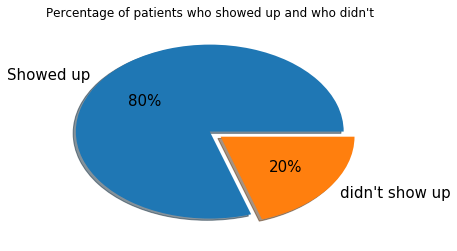

In [22]:
# Representing results on a pie chart
data = [no_percentage, yes_percentage]
plt.pie(data, labels = ['Showed up','didn\'t show up'], autopct='%1.0f%%', explode = (0,0.1), shadow=True, textprops = {"fontsize":15})
plt.title('Percentage of patients who showed up and who didn\'t')

We can see that 80% of patients showed up for the appointment, while 20% didn't.

### Which gender is more likely to show up? What effect does gender have on patient ability to show up?

##### Calculating the percentages

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Calculating number of females and males in the dataset
females = df['gender'].value_counts()[0]
males = df['gender'].value_counts()[1]

# Calculating percentage of showed up females
showed_up_females = df[ (df['gender'] == 'F') & (df['no-show'] == 'No') ]
showed_up_females_percent = round(len(showed_up_females)*100/females)

# Calculating percentage of showed up males
showed_up_males = df[ (df['gender'] == 'M') & (df['no-show'] == 'No') ]
showed_up_males_percent = round(len(showed_up_males)*100/males)

print("Percentage of females who showed up is {}% . Percentage of males who showed up is {}% .".format(showed_up_females_percent,showed_up_males_percent))


Percentage of females who showed up is 80% . Percentage of males who showed up is 80% .


So we can conclude that no gender is more likely to show up than the other.

##### Visualizing the results

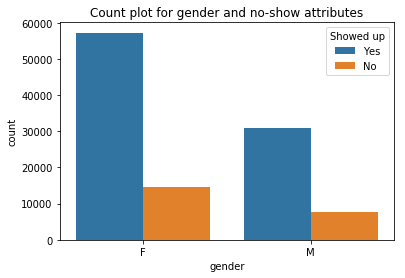

In [24]:
# Creating a countplot for gender and no-show
sns.countplot(x = 'gender',  hue = 'no-show',data = df)
plt.title('Count plot for gender and no-show attributes')
plt.legend(title='Showed up',labels=['Yes', 'No']);
plt.show()

From the above we can conclude that the gender has no effect on showing up.

### What effect does age have on patient ability to show up? Which age group is more likely to show up?

#### Count for the number of patients for each age group

Text(0.5,1,'Count of patients within an age category')

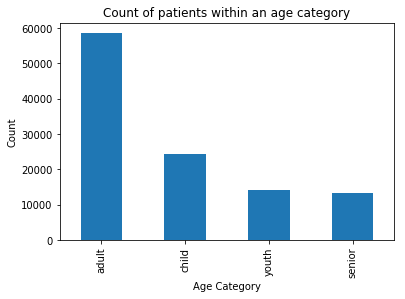

In [25]:
df['age_group'].value_counts().plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of patients within an age category')

From the above graph we can see that most patients are **adults**.

#### Calculating the percentage of show ups for a certain age group

In [26]:
# calculate the percentage of show ups for a certain age group
child_showed_up_percent = len( df[(df['age_group'] == 'child') & (df['no-show'] == 'No')] )*100/len(df.query('age_group == "child"'))
youth_showed_up_percent = len( df[(df['age_group'] == 'youth') & (df['no-show'] == 'No')] )*100/len(df.query('age_group == "youth"'))
adult_showed_up_percent = len( df[(df['age_group'] == 'adult') & (df['no-show'] == 'No')] )*100/len(df.query('age_group == "adult"'))
senior_showed_up_percent = len( df[(df['age_group'] == 'senior') & (df['no-show'] == 'No')] )*100/len(df.query('age_group == "senior"'))

#### Visualizing the results

In [27]:
# define function for creating a pie plot for each age group
def pie_plot(percent, title):
    data = [percent, 100 - percent]
    plt.pie(data, labels = ['Showed up','didn\'t show up'], autopct='%1.2f%%', explode = (0,0.1), shadow=True, textprops = {"fontsize":15})
    plt.title('Percentage of {} patients who showed up and who didn\'t'.format(title))


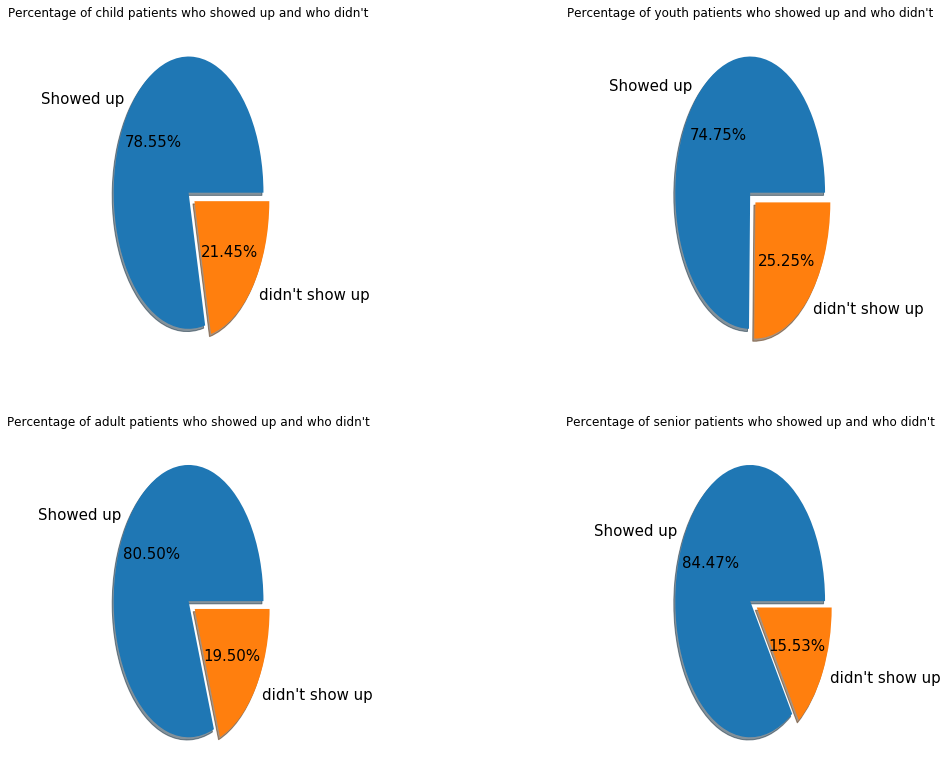

In [28]:
# making subplots
plt.subplots(2,2,figsize=(13,13))
plt.subplot(2,2,1)
pie_plot(child_showed_up_percent, 'child')
plt.subplot(2,2,2)
pie_plot(youth_showed_up_percent, 'youth')
plt.subplot(2,2,3)
pie_plot(adult_showed_up_percent, 'adult')
plt.subplot(2,2,4)
pie_plot(senior_showed_up_percent, 'senior')
  
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=2, 
                    hspace=0.2)
plt.show()

From the above analysis we can conclude that **Seniors** (more than 64 years) are the most likely to show up for the medical appointments. However, **Youth** (15 to 24 years) are the least likely to show up for the medical appointments.

### Is scholarship an important factor that affects patient's ability to show up?

#### Calculations

In [29]:
# calculating percentage of patients with scholarship who showed out
df_with_scholarship = df[df['scholarship'] == 1]
scholarship_showed_out_percent = round(df_with_scholarship['no-show'].value_counts()['No']*100/len(df_with_scholarship))

# calculating percentage of patients without scholarship who showed out
df_without_scholarship = df[df['scholarship'] == 0]
without_scholarship_showed_out_percent = round(df_without_scholarship['no-show'].value_counts()['No']*100/len(df_without_scholarship))


#### Visualizing the results

Text(0.5,1,'Effect of scholarship on showing up')

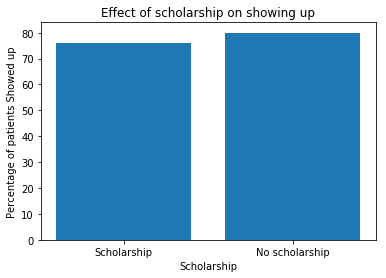

In [30]:
# plotting a bar plot to show the results
x = [1,2]
y = [scholarship_showed_out_percent,without_scholarship_showed_out_percent]
plt.bar(x,y)
plt.xticks(x,['Scholarship','No scholarship'])
plt.xlabel('Scholarship')
plt.ylabel('Percentage of patients Showed up')
plt.title('Effect of scholarship on showing up')

From the above results: Percentage of patients with scholarship who showed up = 76%, 
                        Percentage of patients without scholarship who showed up = 80%
        
So we can conclude that the scholarship doesn't affect the ability to show up.        
    

### What is the effect of the difference between the sheduled date and the appointment date on showing up?

#### Describing the wait_days attribute

In [31]:
df['wait_days'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

Text(0.5,1,'Waiting days distribution')

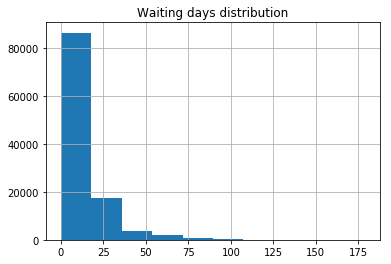

In [32]:
df['wait_days'].hist()
plt.title('Waiting days distribution')

In [33]:
# Grouping wait_days into bins
bins = [df['wait_days'].min(), 0.99, 7, 30, df['wait_days'].max()]
group_names = ['Same day','Less than a Week','Less than a Month','More than a Month']

# Creating new column for the wait_days groups
df['wait_group'] = pd.cut(df['wait_days'], bins, labels = group_names, include_lowest = True)


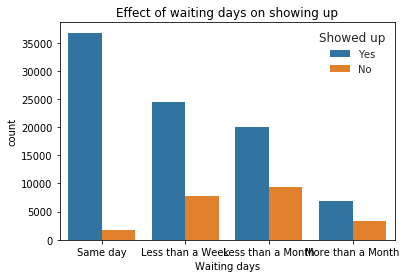

In [34]:
# Creating a countplot for wait_days and no-show attributes
sns.countplot(x = 'wait_group',  hue = 'no-show',data = df)
sns.set(rc = {'figure.figsize':(12,12)})
plt.title('Effect of waiting days on showing up')
plt.legend(title='Showed up',labels=['Yes', 'No'])
plt.xlabel('Waiting days')
plt.show()

From the above results we can see that the waiting days between the scheduled date and the appointment date affects the ability to show up.
The vast majority of patients who have the scheduled date and the appointment date being the same showed up.


<a id='conclusions'></a>
## Conclusions

1. 80% of patients showed up for the appointment, while 20% didn't.
2. Percentage of females who showed up is 80%, percentage of males who showed up is 80%. 
   So no gender is more likely to show up than the other.
3. Most patients are **adults** (25 to 64 years).  
   **Seniors** (more than 64 years) are the most likely to show up for the medical appointments, however **Youth** (15 to 24 years) are the least likely.
4. Percentage of patients with scholarship who showed up = 76%   
   Percentage of patients without scholarship who showed up = 80%  
   The scholarship doesn't affect the ability to show up. 
5. The waiting days between the scheduled date and the appointment date affects the ability to show up.  
   The vast majority of patients who have the scheduled date and the appointment date being the same showed up.
 
   

#### Limitatoions
1. The number of females is more than the number of males in the dataset, so I handled it by using percentages to show which gender is more likely to show up.    
2. The dataset doesn't contain information about the distance between the patient's location and the hospital location (Neighborhood attribute), so I couldn't do an analysis on the distance.  
3. Values within the dataset that don't make sense:  
   - Negative age values and age outliers.  
   - Appointment date before scheduled date.  
This was handled during the cleaning phase.
   
   
